<a href="https://colab.research.google.com/github/tubaaktas/Miuul/blob/main/DataAnalysisWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option("display.width", 500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
def check_df(dataframe, head=8):
  print("##### Shape #####")
  print(dataframe.shape)
  print("##### Types #####")
  print(dataframe.dtypes)
  print("##### Tail #####")
  print(dataframe.tail(head))
  print("##### Head #####")
  print(dataframe.head(head))
  print("##### Null Analysis #####")
  print(dataframe.isnull().sum())
  print("##### Quantiles #####")
  print(dataframe.describe([0,0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##### Shape #####
(891, 15)
##### Types #####
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
##### Tail #####
     survived  pclass     sex   age  sibsp  parch    fare embarked   class    who  adult_male deck  embark_town alive  alone
883         0       2    male  28.0      0      0  10.500        S  Second    man        True  NaN  Southampton    no   True
884         0       3    male  25.0      0      0   7.050        S   Third    man        True  NaN  Southampton    no   True
885         0       3  female  39.0      0      5  29.125        Q   Third  woman       False  NaN   Queenstown    no  False
886         0       2    male  27.0      0      0  13.000      

In [ ]:
data = sns.load_dataset("flights")
check_df(data)

##### Shape #####
(144, 3)
##### Types #####
year             int64
month         category
passengers       int64
dtype: object
##### Tail #####
     year month  passengers
136  1960   May         472
137  1960   Jun         535
138  1960   Jul         622
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432
##### Head #####
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
5  1949   Jun         135
6  1949   Jul         148
7  1949   Aug         148
##### Null Analysis #####
year          0
month         0
passengers    0
dtype: int64
##### Quantiles #####
            count         mean         std     min      0%      5%     50%      95%      99%    100%     max
year        144.0  1954.500000    3.464102  1949.0  1949.0  1949.0  1954.5  1960.00  1960.00  1960.0  1960.0
passengers  144.0   280.2

## **Kategorik Degisken Analizi**

In [ ]:
df["embarked"].value_counts() #sinif sayilari

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
df["sex"].unique() #hangi degerler var sorusunun cevabi

array(['male', 'female'], dtype=object)

In [ ]:
df["sex"].nunique() #kac deger oldugunun sayisal cevabi

2

In [ ]:
df.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class    who  adult_male deck  embark_town alive  alone
0           0       3    male  22.0      1      0   7.2500        S   Third    man        True  NaN  Southampton    no  False
1           1       1  female  38.0      1      0  71.2833        C   First  woman       False    C    Cherbourg   yes  False
2           1       3  female  26.0      0      0   7.9250        S   Third  woman       False  NaN  Southampton   yes   True
3           1       1  female  35.0      1      0  53.1000        S   First  woman       False    C  Southampton   yes  False
4           0       3    male  35.0      0      0   8.0500        S   Third    man        True  NaN  Southampton    no   True
..        ...     ...     ...   ...    ...    ...      ...      ...     ...    ...         ...  ...          ...   ...    ...
886         0       2    male  27.0      0      0  13.0000        S  Second    man    

In [ ]:
#Kategorik degiskenler
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]] #dolastigin sutunlarin icerisinde tipleri category, object veya bool olan var mi? varsa cat_cols a ata.
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [ ]:
#numerik fakat kategorik
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

In [ ]:
# Kardinalitesi yuksek -> Olculemeyecek kadar olcum degeri tasimayacak kadar fazla sinifi olan.
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_but_car #yok.

[]

In [ ]:
cat_cols = num_but_cat + cat_cols # butun kategorik degiskenleri bir araya topluyoruz.
cat_cols

['survived',
 'pclass',
 'sibsp',
 'parch',
 'sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [ ]:
#cat_but_car bos olmasaydi bu sekilde cikartma islemini yapabiliriz. ->
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [ ]:
 #Dogrulama
df[cat_cols].nunique()

survived       2
pclass         3
sibsp          7
parch          7
sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
dtype: int64

In [ ]:
[col for col in df.columns if col not in cat_cols]

['age', 'fare']

In [ ]:
#my func
def cat_sum(dataframe, col_name):
  for count in dataframe[col_name].value_counts():
    return 100*dataframe[col_name].value_counts()/len(dataframe)

#Vahit Keskin code :')
def cat_sum2(dataframe, col_name):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))


#cat_sum(df, "survived") 
cat_sum2(df, "sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302


In [ ]:
for col in cat_cols:
   cat_sum2(df, col)

   survived      Ratio
0       549  61.616162
1       342  38.383838
   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
        sex      Ratio
male    577  64.758698
female  314  35.241302
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A   

        sex      Ratio
male    577  64.758698
female  314  35.241302


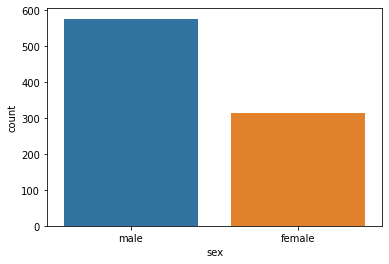

In [ ]:
def cat_sum3(dataframe, col_name, plot = False):
   print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
   if plot:
     sns.countplot(x=dataframe[col_name], data = dataframe)
     plt.show(block=True)

cat_sum3(df, "sex", plot = True)

   survived      Ratio
0       549  61.616162
1       342  38.383838


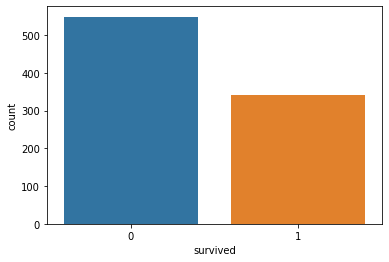

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954


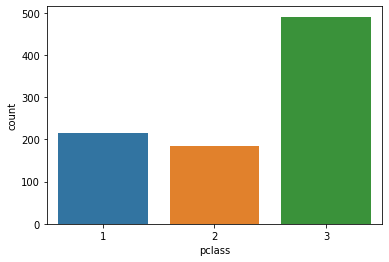

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167


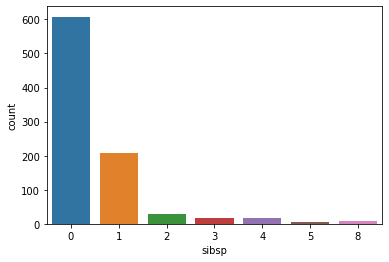

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233


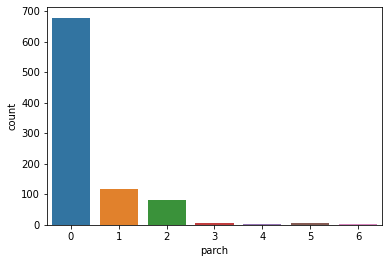

        sex      Ratio
male    577  64.758698
female  314  35.241302


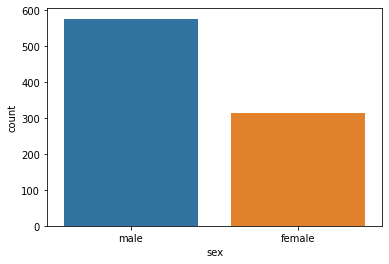

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975


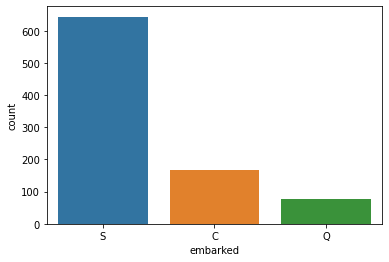

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954


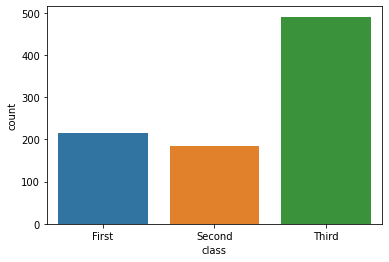

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376


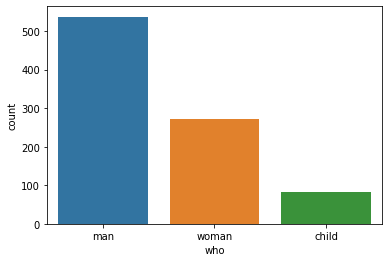

       adult_male     Ratio
True          537  60.26936
False         354  39.73064


ValueError: ignored

In [ ]:
for col in cat_cols:
  cat_sum3(df, col ,plot = True)
  

   survived      Ratio
0       549  61.616162
1       342  38.383838


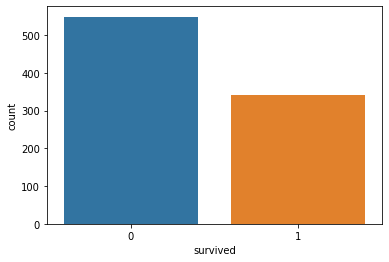


#####################################
   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954


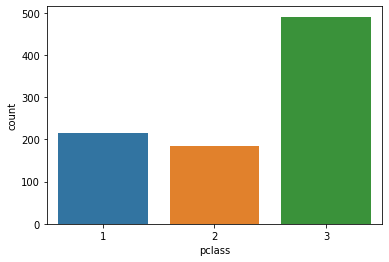


#####################################
   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167


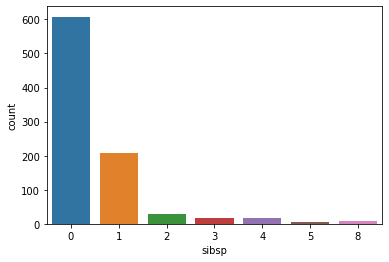


#####################################
   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233


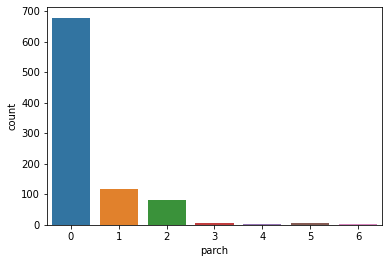


#####################################
        sex      Ratio
male    577  64.758698
female  314  35.241302


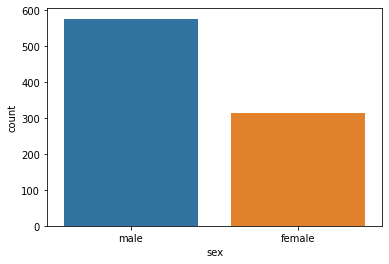


#####################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975


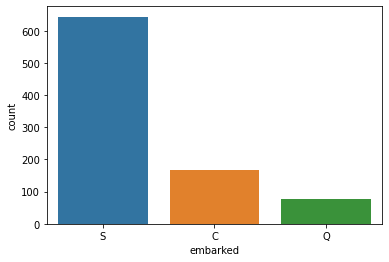


#####################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954


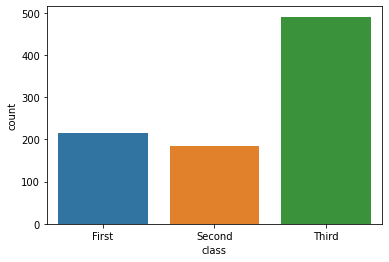


#####################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376


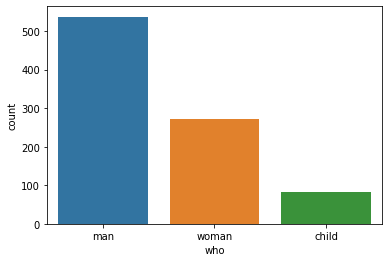


#####################################
 adult_male -> Bu degisken turu bool.
   adult_male     Ratio
1         537  60.26936
0         354  39.73064


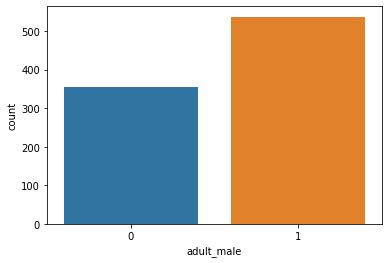

#####################################

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934


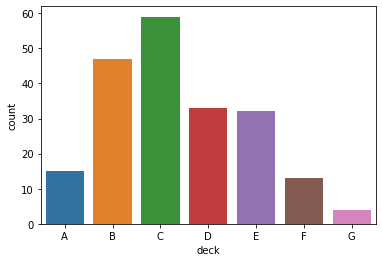


#####################################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975


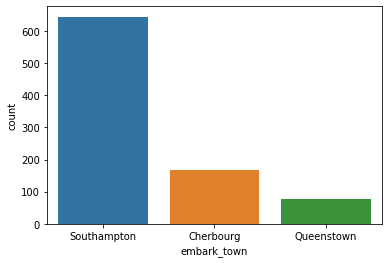


#####################################
     alive      Ratio
no     549  61.616162
yes    342  38.383838


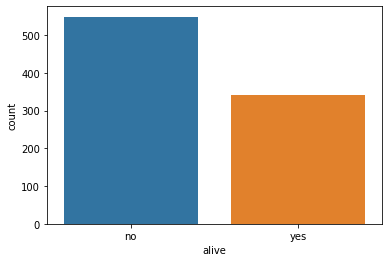


#####################################
 alone -> Bu degisken turu bool.
   alone     Ratio
1    537  60.26936
0    354  39.73064


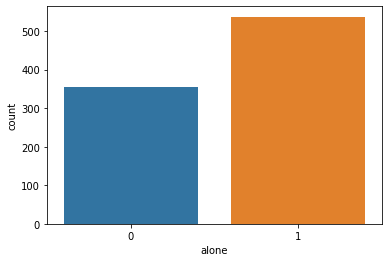

#####################################



In [ ]:
#Yukaridaki kodun hata almasinin sebebi bool turunde bir degiskenin grafigini ekrana bastiramamasindan kaynakli.
for col in cat_cols:
  if df[col].dtypes != "bool":
    cat_sum3(df, col ,plot = True)
    print("\n#####################################")
  else:
    print(f" {col} -> Bu degisken turu bool.")
    df[col] = df[col].astype(int)
    cat_sum3(df, col ,plot = True)
    print("#####################################\n")


#Eger yukaridaki kodda oldugu gibi bir belirtme yaparsak bu konuda sorun yasamayiz.

# **NUMERICAL**

In [ ]:
df[["age","fare"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

['age', 'fare']

In [ ]:
def num_sum(dataframe, num_col):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

for col in num_cols:
  num_sum(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


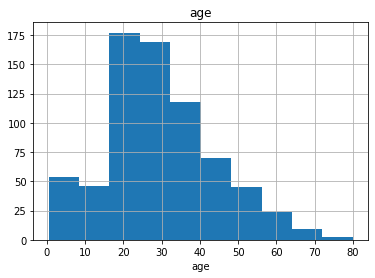




count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


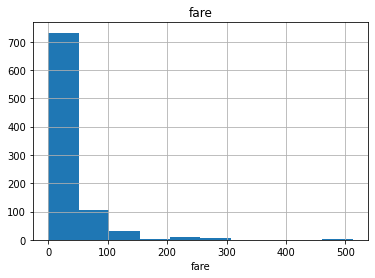

In [ ]:
def num_sum2(dataframe, num_col, plot = False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist()
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block = True)

  print("\n\n")

for col in num_cols:
  num_sum2(df, col, plot=True)

# **Degiskenlerin Yakalanmasi**

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20): #essiz deger sayisi 10dan kucukse kategorik degisken, 20 den buyukse de kardinal degisken gibi dusunucez. 
  cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

  num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]
  
  cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

  cat_cols = num_but_cat + cat_cols
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"Categorical Columns: {len(cat_cols)}")
  print(f"Numerical Columns: {len(num_cols)}")
  print(f"Categoric but Cardinal: {len(cat_but_car)}")
  print(f"Numeric but Categoric: {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car


In [ ]:
grab_col_names(df)

Observations: 891
Variables: 15
Categorical Columns: 13
Numerical Columns: 2
Categoric but Cardinal: 0
Numeric but Categoric: 6


(['survived',
  'pclass',
  'sibsp',
  'parch',
  'adult_male',
  'alone',
  'sex',
  'embarked',
  'class',
  'who',
  'deck',
  'embark_town',
  'alive'],
 ['age', 'fare'],
 [])

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 891
Variables: 15
Categorical Columns: 13
Numerical Columns: 2
Categoric but Cardinal: 0
Numeric but Categoric: 6


In [ ]:
cat_cols

['survived',
 'pclass',
 'sibsp',
 'parch',
 'adult_male',
 'alone',
 'sex',
 'embarked',
 'class',
 'who',
 'deck',
 'embark_town',
 'alive']

In [ ]:
num_cols

['age', 'fare']

In [ ]:
cat_but_car

[]

In [ ]:
def cat_summary(dataframe, col_name):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("#######################################")
  
for col in cat_cols:
  cat_summary(df,col)

   survived      Ratio
0       549  61.616162
1       342  38.383838
#######################################
   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
#######################################
   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
#######################################
   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
#######################################
   adult_male     Ratio
1         537  60.26936
0         354  39.73064
#######################################
   alone     Ratio
1    537  60.26936
0    354  39.73064
#######################################
        sex      Ratio
male    577  64.758698
female  314  35.241302
#######################################
   embarked      Ratio
S       644  72.278339
C  

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


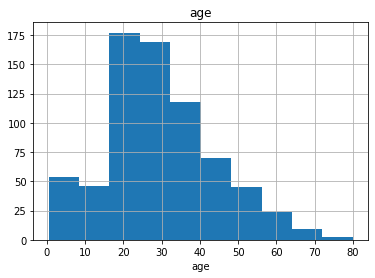




count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


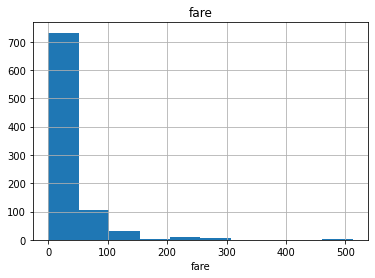

In [ ]:
def num_summary(dataframe, num_col, plot = False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist()
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block = True)

  print("\n\n")

for col in num_cols:
  num_summary(df, col, plot=True)

In [ ]:
#BONUS
df=sns.load_dataset("titanic")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#bool tipindeki verilerimizi integer a ceviriyoruz.
for col in df.columns:
  if df[col].dtypes == "bool":
    df[col] = df[col].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    int64   
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    int64   
dtypes: category(2), float64(2), int64(6), object(5)
memory usage: 92.8+ KB


In [ ]:
grab_col_names(df)

Observations: 891
Variables: 15
Categorical Columns: 13
Numerical Columns: 2
Categoric but Cardinal: 0
Numeric but Categoric: 6


(['survived',
  'pclass',
  'sibsp',
  'parch',
  'adult_male',
  'alone',
  'sex',
  'embarked',
  'class',
  'who',
  'deck',
  'embark_town',
  'alive'],
 ['age', 'fare'],
 [])

In [ ]:
cat_cols

['survived',
 'pclass',
 'sibsp',
 'parch',
 'adult_male',
 'alone',
 'sex',
 'embarked',
 'class',
 'who',
 'deck',
 'embark_town',
 'alive']

   survived      Ratio
0       549  61.616162
1       342  38.383838


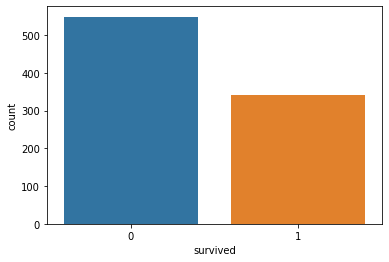

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954


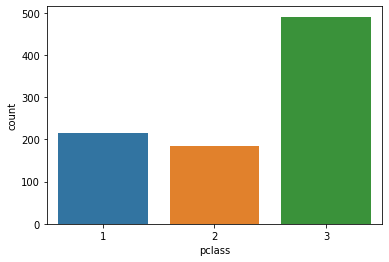

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167


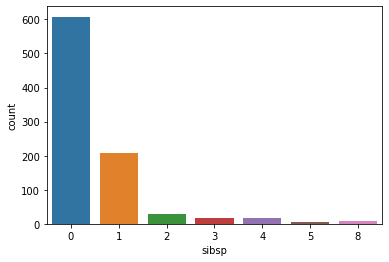

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233


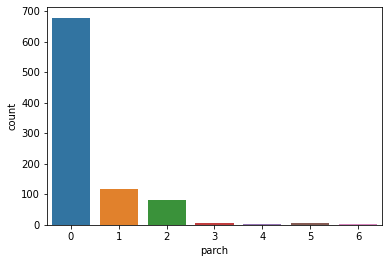

   adult_male     Ratio
1         537  60.26936
0         354  39.73064


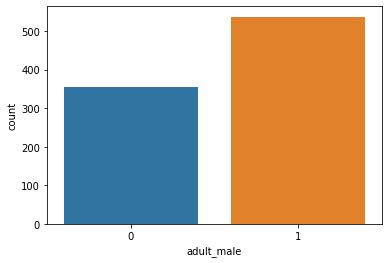

   alone     Ratio
1    537  60.26936
0    354  39.73064


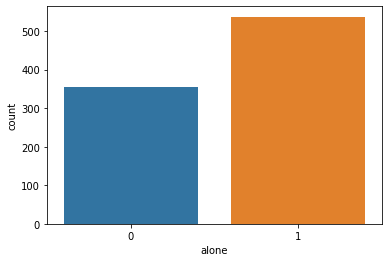

        sex      Ratio
male    577  64.758698
female  314  35.241302


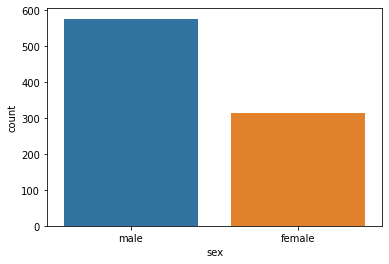

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975


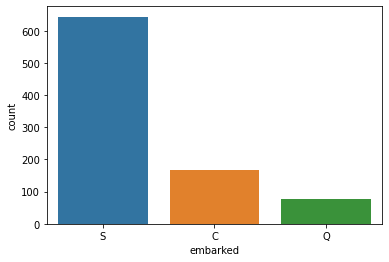

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954


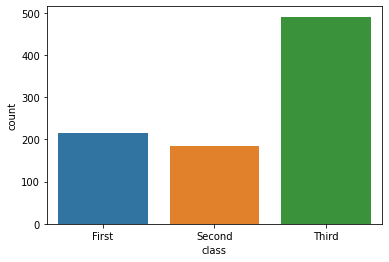

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376


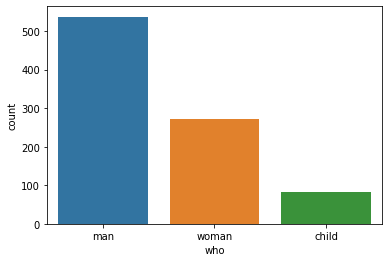

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934


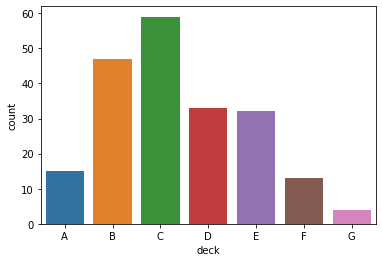

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975


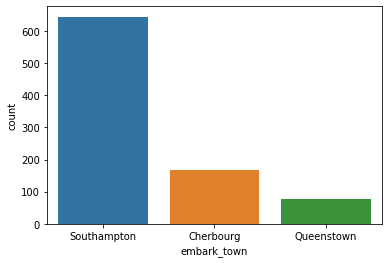

     alive      Ratio
no     549  61.616162
yes    342  38.383838


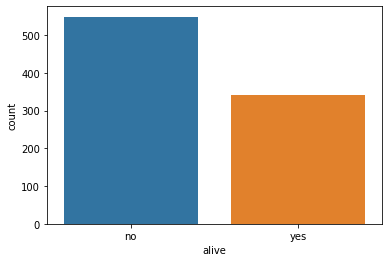

In [ ]:
def cat_sum_plot(dataframe, col_name, plot = False):
   print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
   if plot:
     sns.countplot(x=dataframe[col_name], data = dataframe)
     plt.show(block=True)

for col in cat_cols:
  cat_sum_plot(df, col, plot = True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


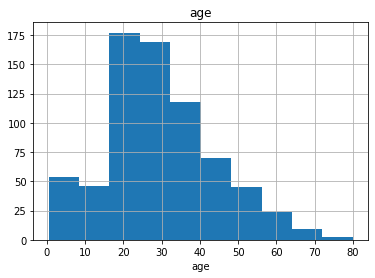




count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


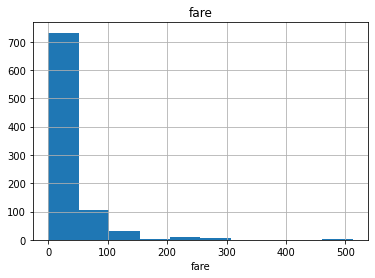

In [ ]:
for col in num_cols:
  num_summary(df, col, plot = True)

# **Hedef Degisken Analizi**

In [ ]:
#Hedef degiskenin kategorik degiskenler ile analizi
#Bizim simdilik hedef degiskenimiz "survived"
df.groupby("sex")["survived"].mean()
#kadinlarin %74 erkeklerin %18 hayatta kaldigini gormus olduk.

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [ ]:
#Bunun icin tek tek yazmak yerine bir fonksiyon olusturduk.
def target_sum_with_cat(dataframe, target, categorical_col):
  print(pd.DataFrame({"TARGET_MEAN" :df.groupby(categorical_col)[target].mean()}))

In [ ]:
target_sum_with_cat(df, "survived", "sex")

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


In [ ]:
for col in cat_cols:
  target_sum_with_cat(df, "survived", col)

          TARGET_MEAN
survived             
0                 0.0
1                 1.0
        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363
       TARGET_MEAN
sibsp             
0         0.345395
1         0.535885
2         0.464286
3         0.250000
4         0.166667
5         0.000000
8         0.000000
       TARGET_MEAN
parch             
0         0.343658
1         0.550847
2         0.500000
3         0.600000
4         0.000000
5         0.200000
6         0.000000
            TARGET_MEAN
adult_male             
0              0.717514
1              0.163873
       TARGET_MEAN
alone             
0         0.505650
1         0.303538
        TARGET_MEAN
sex                
female     0.742038
male       0.188908
          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957
        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363
       T

In [ ]:
#Hedef degiskenin sayisal degiskenler ile analizi
#df.groupby("survived")["age"].mean()
df.groupby("survived").agg({"age":"mean"})

,age
survived,
0,30.626179
1,28.343690


In [ ]:
def target_sum_with_num(dataframe, target, numerical_col):
  print(df.groupby(target).agg({numerical_col:"mean"}))

In [ ]:
target_sum_with_num(df, "survived","age")

                age
survived           
0         30.626179
1         28.343690


In [ ]:
for col in num_cols:
  target_sum_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690
               fare
survived           
0         22.117887
1         48.395408


# **Korelasyon Analizi**

In [ ]:
data = pd.read_csv("breast_cancer.csv")

In [ ]:
data = data.iloc[:, 1:-1] #id ve unnamed degiskenlerini almak istemedigimizden bunu belirtiyor ve aradaki degerleri aliyoruz.
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#sadece sayisal degiskenleri sectik.
num_cols = [col for col in data.columns if data[col].dtype in [int, float]]

### Korelasyon Nedir ? Degiskenlerin birbiriyle iliskisini ifade eden -1 ile +1 arasinda degerler alan bir olcumdur.
###-1 veya +1 e yaklastikca korelasyon gucu artar. +1 e yakinsa pozitif korelasyon, 1 e yakinsa negatif korelasyon denir.
###Pozitif korelasyonda bir degiskenin degeri arttikca digerinin de artar, negatif korelasyonda ise bir degiskenin degeri artiyorsa digerinin azalir.

In [ ]:
# Korelasyon hesaplamasi yaptik. Asagida butun degiskenlerin birbiriyle korelasyonu hesaplandi. 
corr=data[num_cols].corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


**NOT!**
> Analitik calismalarda birbiriyle yuksek korelasyonlu olan degiskenlerin calismalarda bulunmamasini isteriz. Cunku ikisi de ayni seyi ifade ediyor. Bu sebeple bu durumda olan iki degiskenden birini calismalarin disinda tutariz.



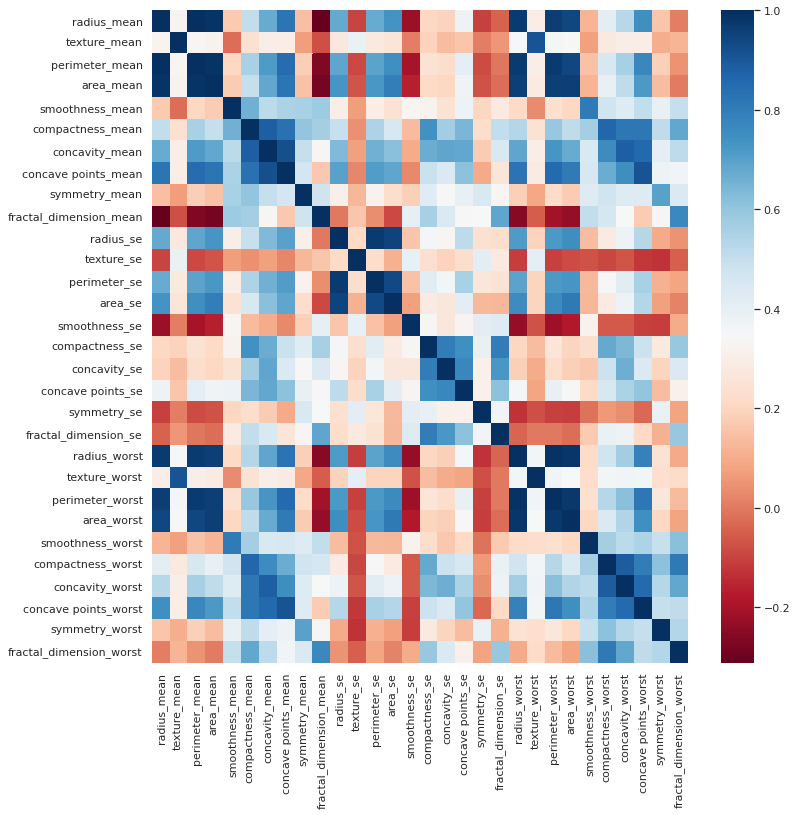

In [ ]:
sns.set(rc={'figure.figsize': (12,12)}) #12 ye 12lik bir grafik olusturuyoruz.
sns.heatmap(corr, cmap="RdBu")#isi haritasi red&blue
plt.show()

# **Yuksek Korelasyonlu Degiskenlerin Silinmesi**

In [ ]:
cor_matrix = data.corr().abs() #butun degerleri pozitif hale getirdik.
cor_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]>0.90)]
drop_list

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [ ]:
cor_matrix[drop_list] #cor matrixindeki silinecek degerleri getirdi. Yani korelasyonu yuksek olanlar

,perimeter_mean,area_mean,concave points_mean,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,concave points_worst
radius_mean,0.997855,0.987357,0.822529,0.674172,0.735864,0.969539,0.297008,0.965137,0.941082,0.744214
texture_mean,0.329533,0.321086,0.293464,0.281673,0.259845,0.352573,0.912045,0.358040,0.343546,0.295316
perimeter_mean,1.000000,0.986507,0.850977,0.693135,0.744983,0.969476,0.303038,0.970387,0.941550,0.771241
area_mean,0.986507,1.000000,0.823269,0.726628,0.800086,0.962746,0.287489,0.959120,0.959213,0.722017
smoothness_mean,0.207278,0.177028,0.553695,0.296092,0.246552,0.213120,0.036072,0.238853,0.206718,0.503053
compactness_mean,0.556936,0.498502,0.831135,0.548905,0.455653,0.535315,0.248133,0.590210,0.509604,0.815573
concavity_mean,0.716136,0.685983,0.921391,0.660391,0.617427,0.688236,0.299879,0.729565,0.675987,0.861323
concave points_mean,0.850977,0.823269,1.000000,0.710650,0.690299,0.830318,0.292752,0.855923,0.809630,0.910155
symmetry_mean,0.183027,0.151293,0.462497,0.313893,0.223970,0.185728,0.090651,0.219169,0.177193,0.430297
fractal_dimension_mean,0.261477,0.283110,0.166917,0.039830,0.090170,0.253691,0.051269,0.205151,0.231854,0.175325


In [ ]:
data.drop(drop_list, axis = 1)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


In [ ]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Butun bu islemleri tek bir fonksiyonda  topladik.
def high_correlated_cols(dataframe, plot= False, corr_th = 0.90):
  corr = dataframe.corr()
  cor_matrix = corr.abs()
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]>0.90)]
  if plot:
    sns.set(rc={'figure.figsize': (15,15)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

In [ ]:
high_correlated_cols(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


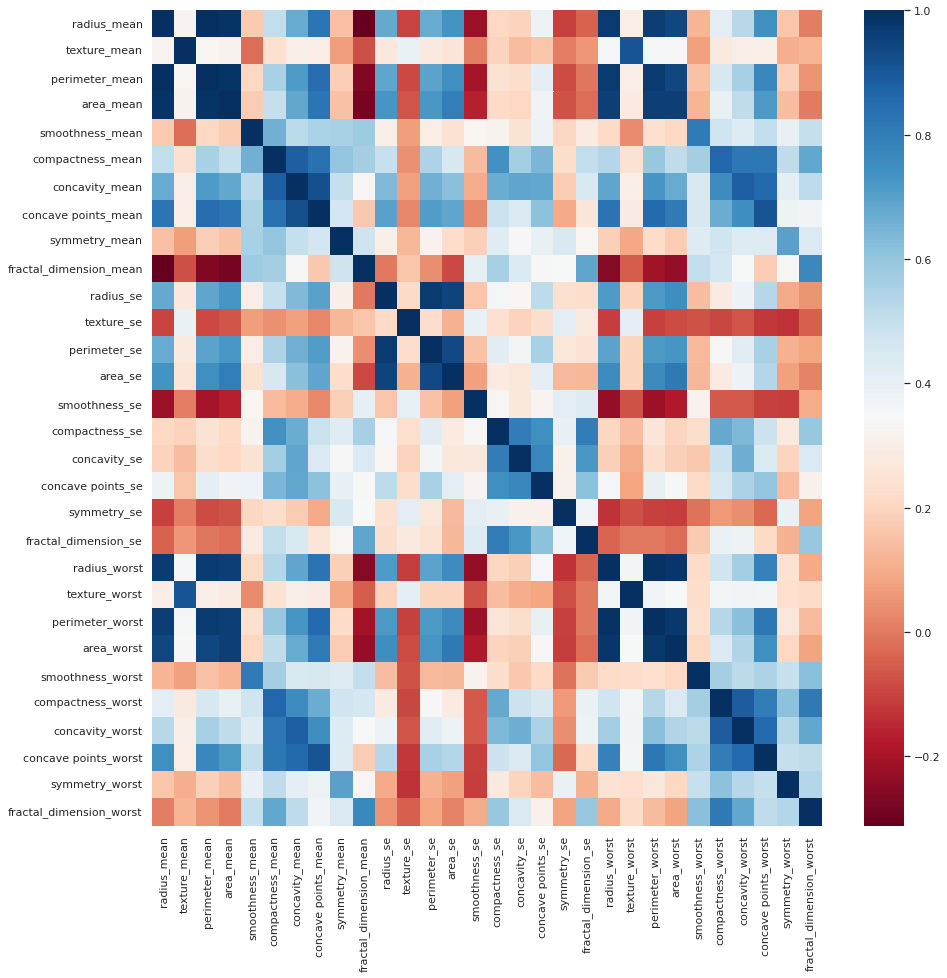

In [ ]:
drop_list = high_correlated_cols(data, plot = True)

In [ ]:
data.drop(drop_list, axis = 1)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


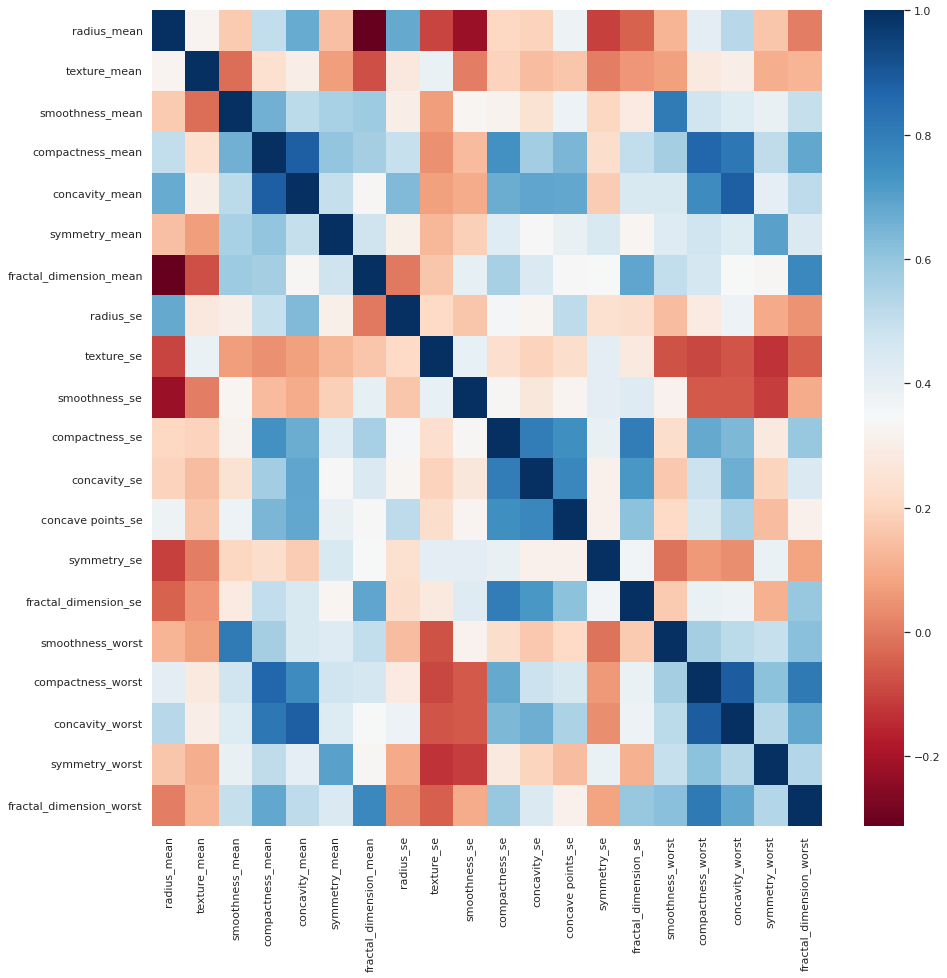

[]

In [ ]:
high_correlated_cols(data.drop(drop_list, axis = 1), plot = True)